In [4]:
import pickle
with open("result/result.pkl", "rb") as f:
    all_result = pickle.load(f)

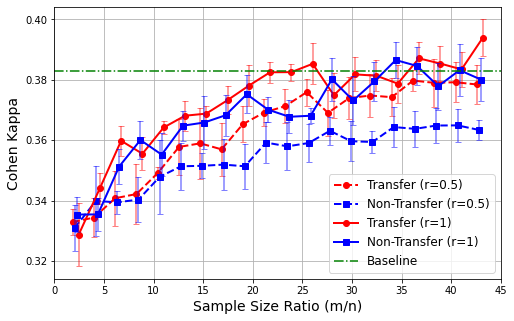

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a=np.array(all_result)

# Prepare the x-axis (first 20 m/n values)
x_mn = np.array([50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000,
                    550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000])/23313  # replace with your actual candidate_m_syn[:20] if available

# Slice the first 20 m/n values and remove last dimension
arr_plot = a[:, :, :20, 1]  # shape: (4, 5, 20)


# Compute mean and std over repetitions (axis=1)
mean_vals = np.mean(arr_plot, axis=1)  # shape: (4, 20)
std_vals = np.std(arr_plot, axis=1)    # shape: (4, 20)

# Plotting styles
styles = [
    {'color': 'red',  'linestyle': '--', 'marker': 'o', 'label': 'Transfer (r=0.5)'},  # square, bold
    {'color': 'blue', 'linestyle': '--', 'marker': 's', 'label': 'Non-Transfer (r=0.5)'},  # square, dash
    {'color': 'red',  'linestyle': '-',  'marker': 'o', 'label': 'Transfer (r=1)'},  # circle, bold
    {'color': 'blue', 'linestyle': '-',  'marker': 's', 'label': 'Non-Transfer (r=1)'}   # circle, dash
]

# Start plotting
plt.figure(figsize=(8, 5))

offset = [-0.3, -0.1, 0.3, 0.1]  # slight shifts for each method

for i in range(4):
    # Plot main line
    plt.plot(
        x_mn + offset[i],
        mean_vals[i],
        styles[i]['linestyle'],
        color=styles[i]['color'],
        marker=styles[i]['marker'],
        markersize=6,
        linewidth=2,
        label=styles[i]['label']
    )

    # Plot transparent error bars separately
    plt.errorbar(
        x_mn + offset[i],
        mean_vals[i],
        yerr=std_vals[i],
        fmt='none',
        ecolor=styles[i]['color'],
        alpha=0.5,         # lower alpha = more transparent error bars
        elinewidth=1.5,
        capsize=3
    )

plt.axhline(y=np.mean(a[:, :, 20, 1]), color='g', linestyle='-.', label="Baseline")

# Labels and title
plt.xlabel("Sample Size Ratio (m/n)", fontsize=14)
plt.ylabel("Cohen Kappa", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(0, 45)
plt.savefig("da_yelp.png", dpi=300)
# Show plot
plt.show()